# <font color='Blue'>CS109 Project : Educational Oversight</font>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

C:\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## <font color='Blue'>Parse Data - Teacher's Salary, Years of Experience, Highest Qualification</font>

In [2]:
df_year_salary_exp_qual = pd.read_csv("Teacher_Year_Salary_Experience_Qualification.csv")
print df_year_salary_exp_qual.shape
df_year_salary_exp_qual.head()

(240, 4)


,Year,Qualification,Experience,Average Base Salary
0,1990-91,Bachelor,1 or less,37160
1,1990-91,Bachelor,2,37400
2,1990-91,Bachelor,3,38770
3,1990-91,Bachelor,4,39990
4,1990-91,Bachelor,5,41580


In [3]:
df_state_2011_salary_exp = pd.read_csv("Teacher_State_2011_Salary_Experience.csv")
print df_state_2011_salary_exp.shape
df_state_2011_salary_exp.head()

(51, 7)


,State,Year,2 or fewer years,3 to 5 years,6 to 10 years,11 to 20 years,Over 20 years
0,Alabama,2011-12,35030,39070,40150,43490,46810
1,Alaska,2011-12,47930,50790,NaN,65020,NaN
2,Arizona,2011-12,32850,35170,35650,41010,46640
3,Arkansas,2011-12,37390,36200,39540,43390,48000
4,California,2011-12,47310,48930,58570,66030,73980


## <font color='Blue'>Parse Data - merged.csv</font>

In [4]:
df_merged_overall = pd.read_csv("merged.csv")
print df_merged_overall.shape
df_merged_overall.head()

(1428, 66)


,state_name,year,secondary_teachers,total_rd_expenditures,pupil_teacher_ratio,full_time_equivalent,grade_9_students_enrollment,grade_10_students_enrollment,grade_11_students_enrollment,grade_12_students_enrollment,grade_9_dropouts,grade_10_dropouts,grade_11_dropouts,grade_12_dropouts,grades_9_12_dropouts,no_of_sat_test_takers,critical_reading_mean,critical_reading_sd,mathematics_mean,mathematics_sd,writing_mean,writing_sd,no_high_school_diploma,high_school_or_equivalent,some_college_less_than_4_yr_degree,bachelors_degree_or_higher,american_indian_alaska_native_male_grade_9,american_indian_alaska_native_female_grade_9,asian_or_asian_pacific_islander_male_grade_9,asian_or_asian_pacific_islander_female_grade_9,hispanic_male_grade_9,hispanic_female_grade_9,black_male_grade_9,black_female_grade_9,white_male_grade_9,white_female_grade_9,american_indian_alaska_native_male_grade_10,american_indian_alaska_native_female_grade_10,asian_or_asian_pacific_islander_male_grade_10,asian_or_asian_pacific_islander_female_grade_10,hispanic_male_grade_10,hispanic_female_grade_10,black_male_grade_10,black_female_grade_10,white_male_grade_10,white_female_grade_10,american_indian_alaska_native_male_grade_11,american_indian_alaska_native_female_grade_11,asian_or_asian_pacific_islander_male_grade_11,asian_or_asian_pacific_islander_female_grade_11,hispanic_male_grade_11,hispanic_female_grade_11,black_male_grade_11,black_female_grade_11,white_male_grade_11,white_female_grade_11,american_indian_alaska_native_male_grade_12,american_indian_alaska_native_female_grade_12,asian_or_asian_pacific_islander_male_grade_12,asian_or_asian_pacific_islander_female_grade_12,hispanic_male_grade_12,hispanic_female_grade_12,black_male_grade_12,black_female_grade_12,white_male_grade_12,white_female_grade_12
0,ALABAMA,2013,14133.06,NaN,15.82,47161.77,62069,56144,51527,48965,864,1128,1048,862,3902,3172,547,119,538,122,532,118,256,615,496,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,2012,21449.70,NaN,14.35,51877.22,61642,56229,50387,48945,865,900,829,698,3292,3558,544,117,534,121,530,118,238,588,553,504,280,295,401,362,1281,1152,11627,10708,18304,16776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALABAMA,2011,20759.19,NaN,15.60,47722.67,61412,55908,50785,49510,1256,1335,1221,842,4654,3879,528,121,531,121,527,116,310,564,562,427,269,250,387,373,1165,1023,11432,10461,18120,16906,239,281,372,372,1025,886,9904,9774,16863,15734,264,251,315,348,832,753,8403,8820,15516,14862,249,219,324,313,712,649,8049,9126,14905,14515
3,ALABAMA,2010,21306.38,NaN,15.31,49363.24,62615,57644,51962,49719,1216,1409,1256,1097,4978,3664,546,119,541,121,536,115,291,628,527,402,252,275,395,347,1129,935,11768,10844,18437,16611,285,271,323,363,944,858,10256,10105,16931,15902,254,221,336,324,750,654,8443,9316,15369,14979,253,241,274,277,669,605,8255,8977,14666,14325
4,ALABAMA,2009,20417.00,761982,15.77,47492.00,63338,57794,50199,48164,1263,1461,1358,1267,5349,3365,556,112,550,116,544,108,325,570,540,428,304,285,351,373,1115,965,12364,11418,18911,17118,284,237,355,349,932,823,10588,10803,17048,16292,261,243,295,302,716,645,8276,9051,15308,15000,221,244,323,337,595,566,8057,9074,14412,14272


In [5]:
df_merged_2004_onwards = df_merged_overall[df_merged_overall['year'] >= 2004]
print df_merged_2004_onwards.shape
df_merged_2004_onwards.head()

(510, 66)


,state_name,year,secondary_teachers,total_rd_expenditures,pupil_teacher_ratio,full_time_equivalent,grade_9_students_enrollment,grade_10_students_enrollment,grade_11_students_enrollment,grade_12_students_enrollment,grade_9_dropouts,grade_10_dropouts,grade_11_dropouts,grade_12_dropouts,grades_9_12_dropouts,no_of_sat_test_takers,critical_reading_mean,critical_reading_sd,mathematics_mean,mathematics_sd,writing_mean,writing_sd,no_high_school_diploma,high_school_or_equivalent,some_college_less_than_4_yr_degree,bachelors_degree_or_higher,american_indian_alaska_native_male_grade_9,american_indian_alaska_native_female_grade_9,asian_or_asian_pacific_islander_male_grade_9,asian_or_asian_pacific_islander_female_grade_9,hispanic_male_grade_9,hispanic_female_grade_9,black_male_grade_9,black_female_grade_9,white_male_grade_9,white_female_grade_9,american_indian_alaska_native_male_grade_10,american_indian_alaska_native_female_grade_10,asian_or_asian_pacific_islander_male_grade_10,asian_or_asian_pacific_islander_female_grade_10,hispanic_male_grade_10,hispanic_female_grade_10,black_male_grade_10,black_female_grade_10,white_male_grade_10,white_female_grade_10,american_indian_alaska_native_male_grade_11,american_indian_alaska_native_female_grade_11,asian_or_asian_pacific_islander_male_grade_11,asian_or_asian_pacific_islander_female_grade_11,hispanic_male_grade_11,hispanic_female_grade_11,black_male_grade_11,black_female_grade_11,white_male_grade_11,white_female_grade_11,american_indian_alaska_native_male_grade_12,american_indian_alaska_native_female_grade_12,asian_or_asian_pacific_islander_male_grade_12,asian_or_asian_pacific_islander_female_grade_12,hispanic_male_grade_12,hispanic_female_grade_12,black_male_grade_12,black_female_grade_12,white_male_grade_12,white_female_grade_12
0,ALABAMA,2013,14133.06,NaN,15.82,47161.77,62069,56144,51527,48965,864,1128,1048,862,3902,3172,547,119,538,122,532,118,256,615,496,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,2012,21449.70,NaN,14.35,51877.22,61642,56229,50387,48945,865,900,829,698,3292,3558,544,117,534,121,530,118,238,588,553,504,280,295,401,362,1281,1152,11627,10708,18304,16776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALABAMA,2011,20759.19,NaN,15.60,47722.67,61412,55908,50785,49510,1256,1335,1221,842,4654,3879,528,121,531,121,527,116,310,564,562,427,269,250,387,373,1165,1023,11432,10461,18120,16906,239,281,372,372,1025,886,9904,9774,16863,15734,264,251,315,348,832,753,8403,8820,15516,14862,249,219,324,313,712,649,8049,9126,14905,14515
3,ALABAMA,2010,21306.38,NaN,15.31,49363.24,62615,57644,51962,49719,1216,1409,1256,1097,4978,3664,546,119,541,121,536,115,291,628,527,402,252,275,395,347,1129,935,11768,10844,18437,16611,285,271,323,363,944,858,10256,10105,16931,15902,254,221,336,324,750,654,8443,9316,15369,14979,253,241,274,277,669,605,8255,8977,14666,14325
4,ALABAMA,2009,20417.00,761982,15.77,47492.00,63338,57794,50199,48164,1263,1461,1358,1267,5349,3365,556,112,550,116,544,108,325,570,540,428,304,285,351,373,1115,965,12364,11418,18911,17118,284,237,355,349,932,823,10588,10803,17048,16292,261,243,295,302,716,645,8276,9051,15308,15000,221,244,323,337,595,566,8057,9074,14412,14272


In [6]:
# List unique values in the df_merged_2004_onwards['state_name'] column
list_states = pd.unique(df_merged_2004_onwards['state_name'].ravel())
print len(list_states)
print list_states

51
['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA' 'NORTH DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE ISLAND' 'SOUTH CAROLINA'
 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING']


In [ ]:
# Subset df_merged_overall by state
df_merged = {}
for state in list_states:
    df_merged[state] = pd.DataFrame(df_merged_overall[df_merged_overall['state_name'] == state])


## <font color='Blue'>Exploratory Data Analysis (EDA) - merged.csv</font>

### 1. Number of secondary teachers (1986 to 2013), Students' enrolment (1986 to 2013) and SAT test-takers (2005 to 2013)

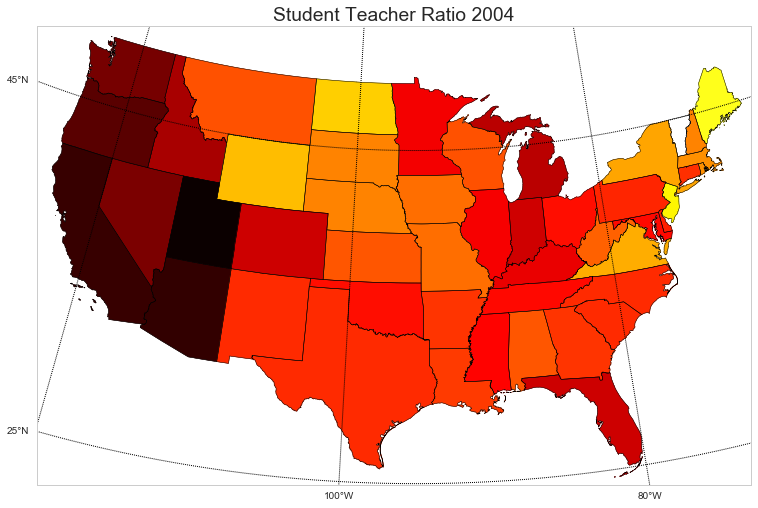

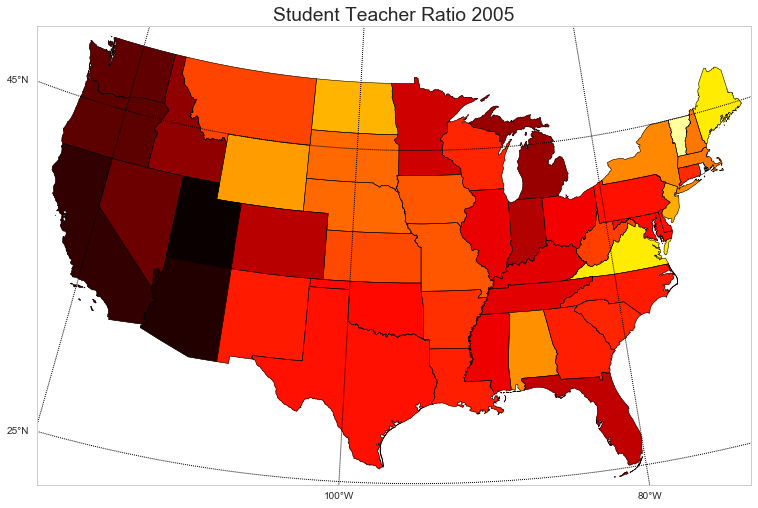

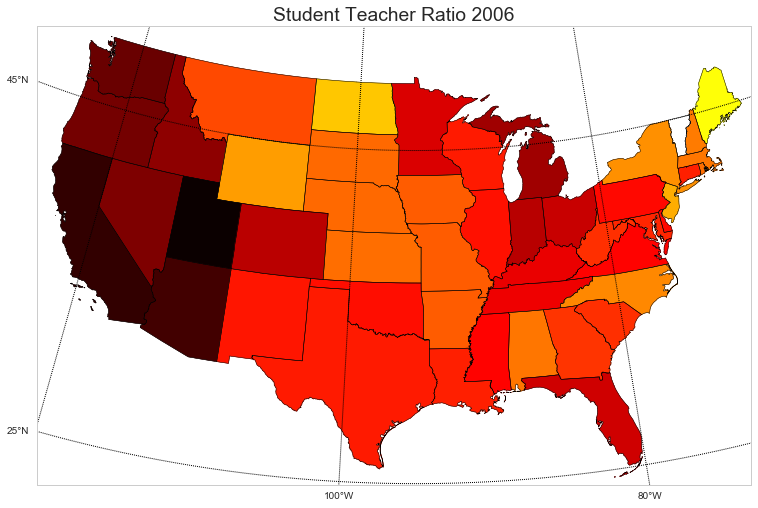

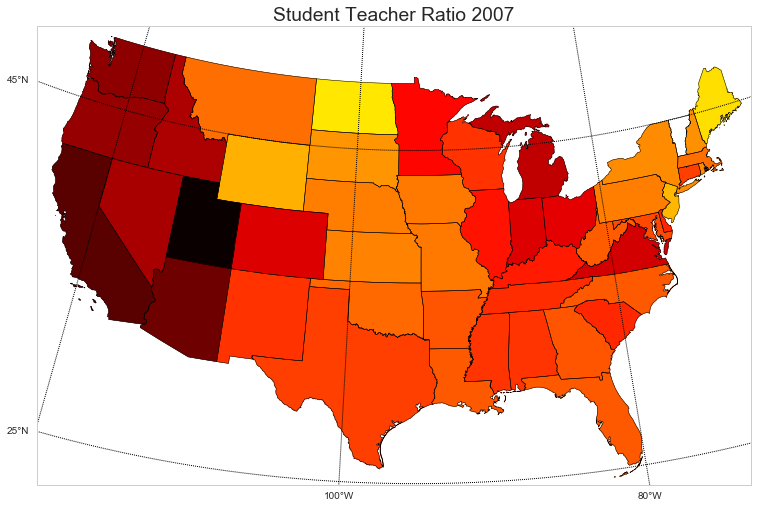

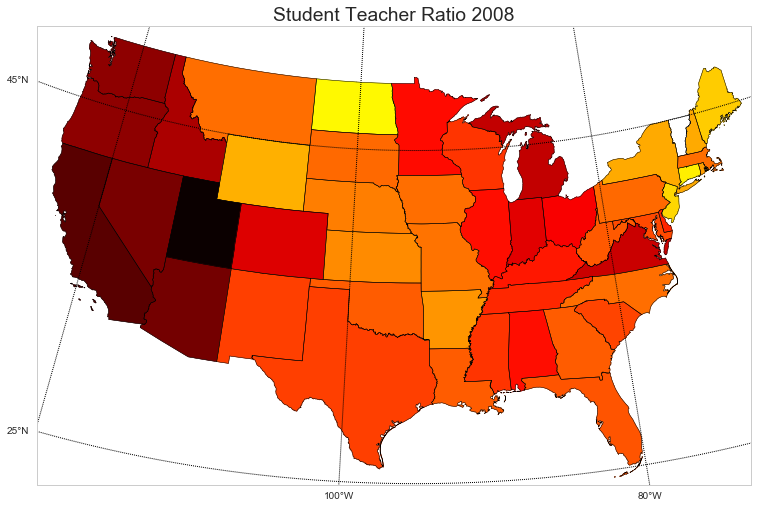

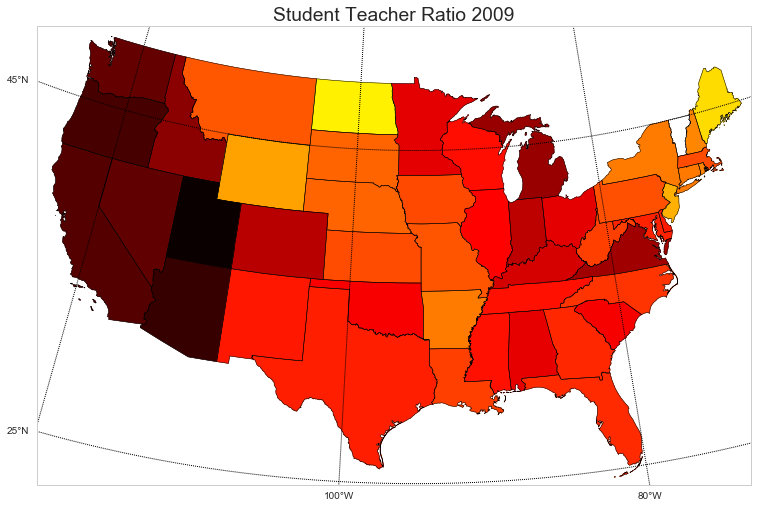

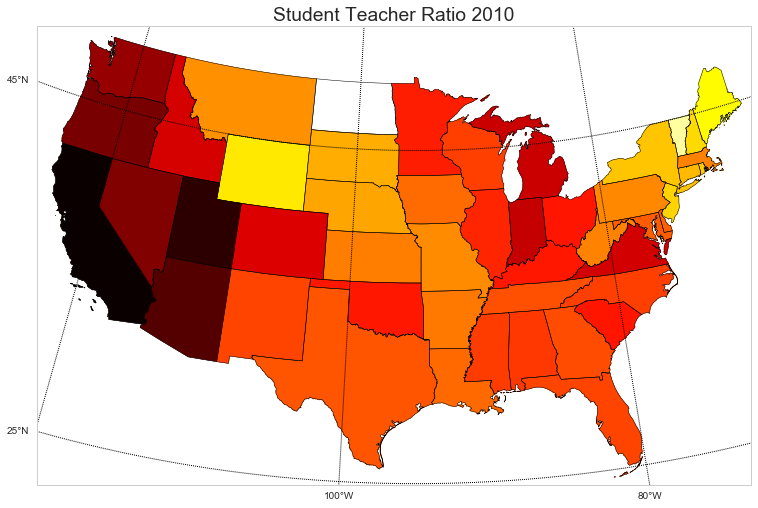

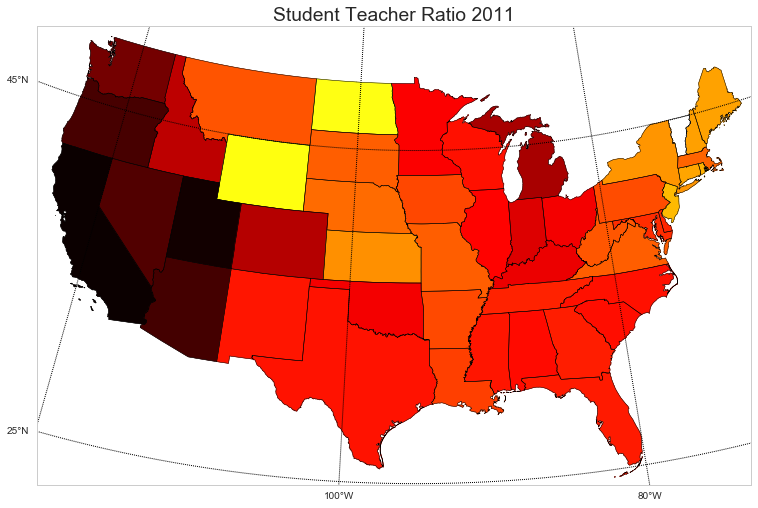

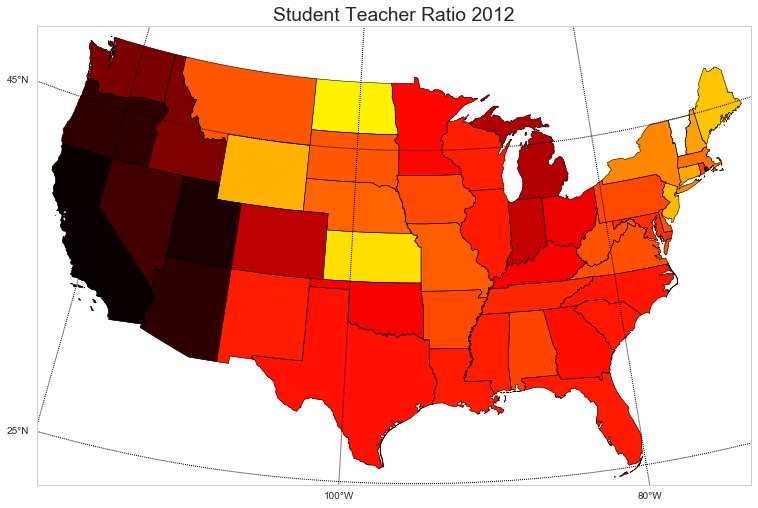

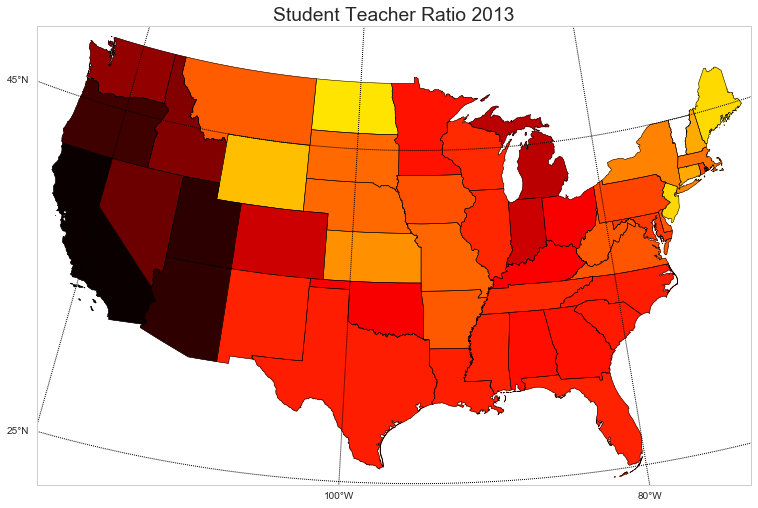

In [59]:
# source: https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py

for current_year in range(2004,2014):
    
    vmin = df_merged_overall[df_merged_overall['year']==current_year]['pupil_teacher_ratio'].min()
    vmax = df_merged_overall[df_merged_overall['year']==current_year]['pupil_teacher_ratio'].max()
    
    # Lambert Conformal map of lower 48 states.
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    
    # draw state boundaries.

    shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
    df_2013 = df_merged_overall[df_merged_overall['year']==current_year]
    popdensity = df_2013.set_index('state_name')['pupil_teacher_ratio'].to_dict()

    # choose a color for each state based on population density.
    colors={}
    statenames=[]
    cmap = plt.cm.hot # use 'hot' colormap

    for shapedict in m.states_info:
        statename = shapedict['NAME']
        # skip ALASKA, DC, and Puerto Rico.
        if statename not in ['District of Columbia','Puerto Rico','Alaska',]:
            pop = popdensity[statename.upper()]
            # calling colormap with value between 0 and 1 returns
            # rgba value.  Invert color range (hot colors are high
            # population), take sqrt root to spread out colors more.
            colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)
    # cycle through state names, color each one.
    ax = plt.gca() # get current axes instance
    
    for nshape,seg in enumerate(m.states):
        # skip DC and Puerto Rico.
        if statenames[nshape] not in ['Puerto Rico','Alaska','District of Columbia']:
            color = rgb2hex(colors[statenames[nshape]]) 
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            ax.add_patch(poly)
    # draw meridians and parallels.
    m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
    m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])
    plt.title('Student Teacher Ratio '+str(current_year))
    plt.show()

In [ ]:
index_year = df_merged['ALABAMA']['year']

for state in list_states:
    number_secondary_teachers = df_merged[state]['secondary_teachers']
    plt.plot(index_year, number_secondary_teachers, label=state)
    
plt.xlabel("Year")
plt.ylabel("Number of Secondary Teachers")

In [ ]:
# Create a 11x5 grid of plots
fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(50, 80))

# Iterate the subplots
for ax, state in zip(axes.ravel(), list_states):
    
    index = df_merged[state]['year']
    teachers = df_merged[state]['secondary_teachers']
    grade9 = df_merged[state]['grade_9_students_enrollment']
    grade10 = df_merged[state]['grade_10_students_enrollment']
    grade11 = df_merged[state]['grade_11_students_enrollment']
    grade12 = df_merged[state]['grade_12_students_enrollment']
    no_of_sat_test_takers = df_merged[state]['no_of_sat_test_takers']
    
    ax.plot(index, teachers, 'o--', color='r', lw=3, label="Teachers")
    ax.plot(index, grade9, 's--', color='g', lw=3, label="Grade 9")
    ax.plot(index, grade10, 's--', color='b', lw=3, label="Grade 10")
    ax.plot(index, grade11, 's--', color='m', lw=3, label="Grade 11")
    ax.plot(index, grade12, 's--', color='k', lw=3, label="Grade 12")
    ax.plot(index, no_of_sat_test_takers, 'd--', color='c', lw=3, label="SAT Test Takers")
    
    ax.set_title(state, color='blue')
    ax.set_xlim((1986, 2013))
#     ax.set_ylim((0, 600000))
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Person")

#### <font color='red'>Note: y-limit have not been set consistently across the sub-plots</font>

### 2. Students' dropouts (2004 to 2013)

In [ ]:
# Create a 11x5 grid of plots
fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(50, 80))

# Iterate the subplots
for ax, state in zip(axes.ravel(), list_states):
    
    index = df_merged[state]['year']
    grade9 = df_merged[state]['grade_9_dropouts']
    grade10 = df_merged[state]['grade_10_dropouts']
    grade11 = df_merged[state]['grade_11_dropouts']
    grade12 = df_merged[state]['grade_12_dropouts']

    ax.plot(index, grade9, 's--', color='r', lw=3, label="Grade 9")
    ax.plot(index, grade10, 's--', color='g', lw=3, label="Grade 10")
    ax.plot(index, grade11, 's--', color='b', lw=3, label="Grade 11")
    ax.plot(index, grade12, 's--', color='m', lw=3, label="Grade 12")
    
    ax.set_title(state, color='blue')
    ax.set_xlim((2004, 2013))
#     ax.set_ylim((0, 2000))
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Person")
    ax.legend(loc='best')

#### <font color='red'>Note: "Year" label for x-limit not showing (suspect due to NaN in the dropouts data)</font>

### 3. SAT section scores (2005 to 2013)

In [ ]:
# Create a 11x5 grid of plots
fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(50, 80))

# Iterate the subplots
for ax, state in zip(axes.ravel(), list_states):
    
    index = df_merged[state]['year']
    
    critical_reading_mean = df_merged[state]['critical_reading_mean']
    critical_reading_sd = df_merged[state]['critical_reading_sd']
    mathematics_mean = df_merged[state]['mathematics_mean']
    mathematics_sd = df_merged[state]['mathematics_sd']
    writing_mean = df_merged[state]['writing_mean']
    writing_sd = df_merged[state]['writing_sd']
    
    ax.errorbar(index - 0.25, critical_reading_mean, critical_reading_sd, fmt='o', ecolor='c', color='r', label="Critical Reading")
    ax.errorbar(index, mathematics_mean, mathematics_sd, fmt='o', ecolor='c', color='g', label="Mathematics")
    ax.errorbar(index + 0.25, writing_mean, writing_sd, fmt='o', ecolor='c', color='b', label="Writing")
    
    ax.set_title(state, color='blue')
    ax.set_xlim((2004, 2014))
    ax.set_ylim((0, 800))
    ax.set_xlabel("Year")
    ax.set_ylabel("SAT Section Scores")
    ax.legend(loc='lower right')

#### <font color='red'>Note: y-limit for the subplots above are not identical</font>

### 4. Current Population Survey (CPS) (2003 to 2013)

In [ ]:
# Create a 11x5 grid of plots
fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(50, 80))

# Iterate the subplots
for ax, state in zip(axes.ravel(), list_states):
    
    index = df_merged[state]['year']
    no_high_school_diploma = df_merged[state]['no_high_school_diploma']
    high_school_or_equivalent = df_merged[state]['high_school_or_equivalent']
    some_college_less_than_4_yr_degree = df_merged[state]['some_college_less_than_4_yr_degree']
    bachelors_degree_or_higher = df_merged[state]['bachelors_degree_or_higher']
    
    ax.plot(index, no_high_school_diploma, 'o--', color='r', lw=3, label="no_high_school_diploma")
    ax.plot(index, high_school_or_equivalent, 's--', color='g', lw=3, label="high_school_or_equivalent")
    ax.plot(index, some_college_less_than_4_yr_degree, 's--', color='b', lw=3, label="some_college_less_than_4_yr_degree")
    ax.plot(index, bachelors_degree_or_higher, 's--', color='m', lw=3, label="bachelors_degree_or_higher")
    
    ax.set_title(state, color='blue')
    ax.set_xlim((2003, 2013))
#     ax.set_ylim((0, 1000))
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Person")

#### <font color='red'>Note: x-limit for CPS and number of secondary teachers are not identical</font>
#### <font color='red'>Note: y-limit for the CPS subplots above are not identical</font>

### 5. PairPlot

In [ ]:
# Reference:
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html
g = sns.pairplot(df_merged_2004_onwards, vars=["no_high_school_diploma", "grade_9_dropouts","grade_10_dropouts",'grade_11_dropouts','grade_12_dropouts'],
                 hue="state_name")

## <font color='Blue'>Parse Data - selected_da_features.csv</font>

In [6]:
df_da_overall = pd.read_csv("selected_da_features.csv")
print df_da_overall.shape
df_da_overall.head()

(676, 26)


,State,Year,population_state_total,population_ages_5�17,number_of_operating_public_schools_district,public_school_enrollment,average_daily_attendance_in_public_schools,number_of_public_high_school_graduates,total_instructional_staff_in_public_schools,number_of_teachers_in_public_schools,percentage_of_public_school_teachers_who_are_men,average_salaries_of_public_school_teachers,average_salaries_of_instructional_staff_in_public_schools,percentage_change_in_average_instructional_staff_salaries,per_capita_personal_income,percentage_change_in_per_capita_personal_income,personal_income_per_student_in_fall_enrollment,personal_income_per_student_in_average_daily_attendance,public_school_revenue_per_student_in_fall_enrollment,public_school_revenue_per_student_in_average_daily_attendance,per_capita_general_expenditures_of_state_governments_for_all_functions,per_capita_expenditures_of_state_local_governments_for_public_welfare,per_capita_expenditures_of_state_local_governments_for_health_hospitals,per_capita_expenditures_of_state_local_governments_for_police_fire_protection,per_capita_expenditures_of_state_local_governments_for_all_education,current_expenditures_for_public_schools_per_student_in_fall_enrollment
0,ALABAMA,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,NaN,NaN,NaN,NaN,3608,929,911,221,1858,NaN
1,ALABAMA,2002,4479,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,25595,3.6,157898,163364,NaN,NaN,3777,1013,963,231,1930,NaN
2,ALABAMA,2003,4504,811,130,729339,702915,36627,55142,45920,21.3,38325,38291,-0.3,26307,5,162771,168734,7305,7580,3894,1022,1008,236,2086,6701
3,ALABAMA,2004,4525,798,131,731085,703819,36767,53352,46514,20.3,38186,39939,6.1,27630,NaN,171617,178068,7967,8276,NaN,NaN,NaN,NaN,NaN,7028
4,ALABAMA,2005,4558,NaN,132,738450,711030,37996,57471,49692,20.6,40347,42384,NaN,NaN,4.1,NaN,NaN,8598,8929,4351,1120,1121,282,NaN,7706


In [7]:
# List unique values in the df_da_overall['State'] column
list_states_da = pd.unique(df_da_overall['State'].ravel())
print len(list_states_da)
print list_states_da

52
['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA' 'NORTH DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE ISLAND' 'SOUTH CAROLINA'
 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UNITED STATES' 'UTAH' 'VERMONT'
 'VIRGINIA' 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING']


In [8]:
# Determine the extra "state" in "list_states_da"
set(list_states_da)-{i for e in list_states for i in list_states_da if e in i}

{'UNITED STATES'}

In [9]:
# Remove data pertaining to "UNITED STATES"
df_da_overall = df_da_overall[df_da_overall['State'] != 'UNITED STATES']
print df_da_overall.shape

(663, 26)


In [10]:
# Re-list unique values in the df_da_overall['State'] column
list_states_da = pd.unique(df_da_overall['State'].ravel())
print len(list_states_da)
print list_states_da

51
['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA' 'NORTH DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE ISLAND' 'SOUTH CAROLINA'
 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING']


In [11]:
# Subset df_merged_overall by state
df_da = {}
for state in list_states:
    df_da[state] = pd.DataFrame(df_da_overall[df_da_overall['State'] == state])

### 1. Number of teachers in public school, graduates and enrolment

In [ ]:
# Create a 11x5 grid of plots
fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(50, 80))

# Iterate the subplots
for ax, state in zip(axes.ravel(), list_states_da):
    
    index = df_da[state]['Year']
    
    teachers = df_da[state]['number_of_teachers_in_public_schools']
    high_school_graduates = df_da[state]['number_of_public_high_school_graduates']
    enrolment = df_da[state]['public_school_enrollment']
    
    ax.plot(index, teachers, 'o--', color='r', lw=3, label="number_of_teachers_in_public_schools")
    ax.plot(index, high_school_graduates, 's--', color='g', lw=3, label="number_of_public_high_school_graduates")
    ax.plot(index, enrolment, 's--', color='b', lw=3, label="public_school_enrollment")
    
    ax.set_title(state, color='blue')
#     ax.set_xlim((2003, 2013))
#     ax.set_ylim((0, 1000))
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Person")

#### <font color='red'>Note: y-limit have not been set consistently across the sub-plots</font>

## <font color='Blue'>Linear Regression</font>

In [ ]:
# from sklearn.linear_model import LinearRegression

# # Creates a LinearRegression object
# lm = LinearRegression()

### Fit a linear model

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [ ]:
# # Use all ??? predictors to fit linear regression model
# lm.fit(X, Y)

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$

In [ ]:
# print 'Estimated intercept coefficient:', lm.intercept_

In [ ]:
# print 'Number of coefficients:', len(lm.coef_)

In [ ]:
# # The coefficients
# pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [ ]:
# # First five predicted prices
# lm.predict(X)[0:5]

### Residual sum of squares

Let's calculate the residual sum of squares 

$$ S = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

In [ ]:
# print np.sum((Y - lm.predict(X)) ** 2)

### Mean squared error

In [ ]:
# mseFull = np.mean((Y - lm.predict(X)) ** 2)
# print mseFull

#### <font color='red'>Is the dataset highly asymmetric?</font>

## <font color='Blue'>Principal Component Analysis (PCA)</font>

#### <font color='red'>We might not need PCA as there are only ??? number of features</font>

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# # Reduce our dimensionality from ??? to ??
# pca = PCA(n_components=??)
# X = pca.fit_transform(data)

In [ ]:
print pca.explained_variance_ratio_.sum()

The explained variance ratio `pca.explained_variance_ratio_` tells us how much of the variation in the features is explained by these 60 features. When we sum it up over the features, we see that ???% is explained: good enough to go down to a ?? dimensional space from a ??? dimensional one!

We can see the individual variances as we increase the dimensionality:

In [ ]:
# pca.explained_variance_ratio_*100

The first dimension accounts for ???% of the variation, the second ?%, and it goes steadily down from there.

Let us create a dataframe with these ??? features labelled pc1,pc2...,pc60 and the labels of the sample:

In [ ]:
# df = pd.DataFrame({"y":y, "label":np.where(y==1, "check", "dollar")})
# for i in range(pca.explained_variance_ratio_.shape[0]):
#     df["pc%i" % (i+1)] = X[:,i]
# df.head()